<a href="https://colab.research.google.com/github/rlawogus1115/test/blob/main/3_DT_lab_ipynb_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Decision Tree & Ensemble</h1>

<h1>Decision Tree</h1>


# import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_digits, load_boston, load_breast_cancer

# 심장병 분류
가슴통증, 혈액순환, 동맥경화를 조건으로 심장병을 분류하는 예제

*  dataset

가슴통증 | 혈액순환 | 동맥경화| 심장질환
---|---|---|---
yes | yes | yes| yes
yes | yes | no| no
no | no | yes | no
no| yes|yes | no
yes|yes|no|no
yes |no|yes| no
no|no|yes|no
no| yes| no| no

# Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier

data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])
X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_gini = DecisionTreeClassifier(criterion = 'gini')
tree_gini.fit(X,y)
print('acc',tree_gini.score(X,y))



[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
acc 1.0


# 트리 시각화
* pydot
    * pip install pydot
* graphviz
    * 실행파일 설치 : https://graphviz.gitlab.io/download/
        * windows : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
    * `pip install graphviz`

In [ ]:
!pip install pydot graphviz

In [ ]:
import pydot
import graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz
import os

#os.environ['PATH'] = "c:/Program Files (x86)/Graphviz2.38/bin"

def showTree(dt, feature_names=None, class_names=None):
    dot_data = StringIO()
    export_graphviz(dt,
                    out_file=dot_data,
                    feature_names=feature_names,
                    class_names=class_names)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    display(graphviz.Source(graph))

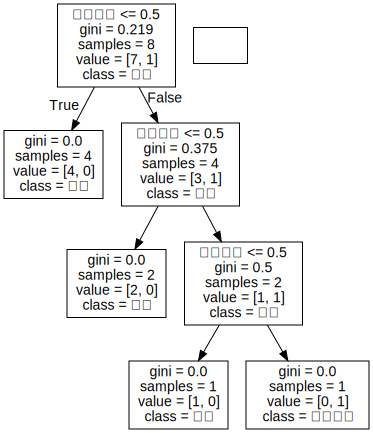

In [ ]:
showTree(tree_gini,('가슴통증','혈액순환','동맥경화'),('정상','심장질환'))

# Entropy
$  \displaystyle -\sum_{i=1}^m p_i \cdot log(p_i) = \sum_{i=1}^m p_i \cdot -log(p_i)$ 

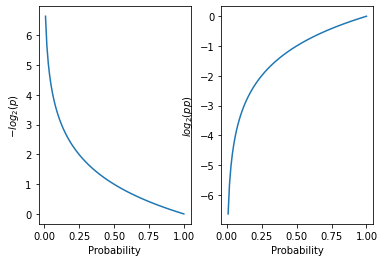

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.01, 1, 100)
log_p = -np.log2(p)

plt.subplot(1,2,1)
plt.plot(p, log_p)
plt.xlabel('Probability')
plt.ylabel('$-log_2(p)$')

log_pp = np.log2(p)
plt.subplot(1,2,2)
plt.plot(p, log_pp)
plt.xlabel('Probability')
plt.ylabel('$log_2(pp)$')
plt.show()

## entropy 실습

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier


data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_ent = DecisionTreeClassifier(criterion='entropy')
tree_ent.fit(X,y)

tree_ent.score(X,y)


[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]


1.0

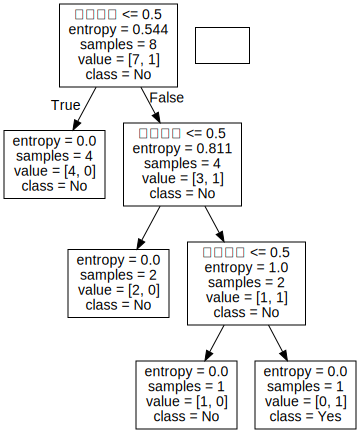

In [ ]:
showTree(tree_ent, ["가슴통증", "혈액순환", "동맥경화"], ["No", "Yes"])

# Max Depth
### Breaset Cancer

In [ ]:
from sklearn import model_selection
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

seed = 42
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data,
                                                        cancer.target,
                                                        stratify=cancer.target,
                                                        random_state=seed
                                                        )

for depth in [None,1,2,3,4]:
  tree = DecisionTreeClassifier(max_depth = depth, random_state=0)
  tree.fit(X_train,y_train)
  acc_train = tree.score(X_train,y_train)
  acc_test = tree.score(X_test,y_test)
  print("depth:",depth,'Train acc:',acc_train,'Test acc:',acc_test)


depth: None Train acc: 1.0 Test acc: 0.9370629370629371
depth: 1 Train acc: 0.9225352112676056 Test acc: 0.9230769230769231
depth: 2 Train acc: 0.9577464788732394 Test acc: 0.9090909090909091
depth: 3 Train acc: 0.9765258215962441 Test acc: 0.9440559440559441
depth: 4 Train acc: 0.9882629107981221 Test acc: 0.951048951048951


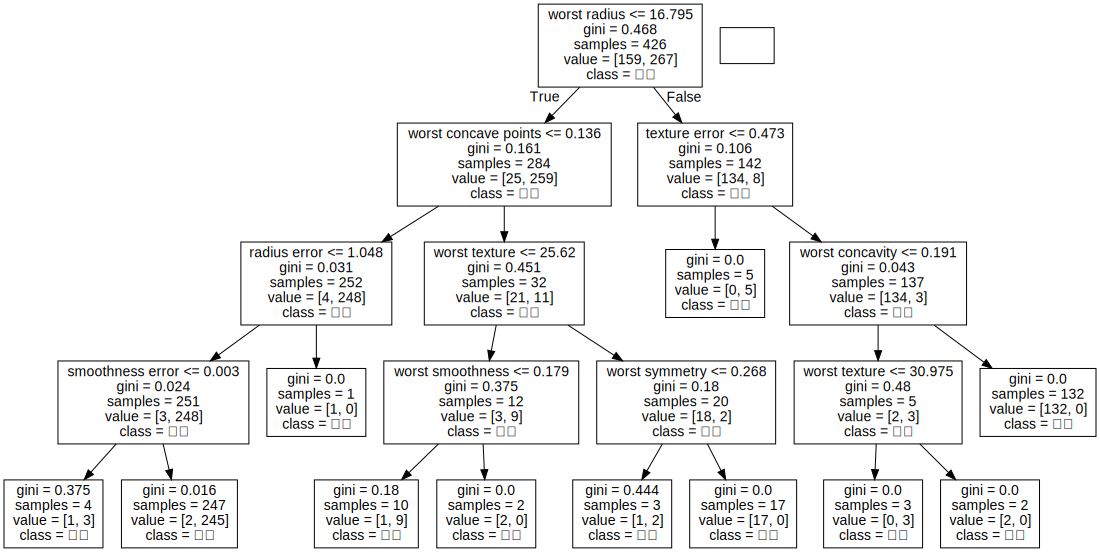

In [ ]:
showTree(tree, cancer.feature_names, ['악성', '양성'])

## Feature importances 시각화

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


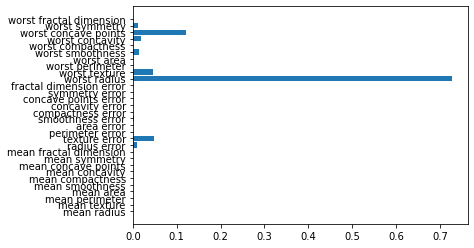

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print(tree.feature_importances_)
plt.barh(range(0,len(cancer.feature_names)),tree.feature_importances_, align='center')
_ = plt.yticks(np.arange(len(cancer.feature_names)),cancer.feature_names)

# Regression Tree(회귀 트리)

acc: 0.8990041625691383


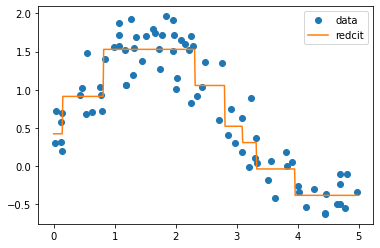

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

n = 80
X = np.sort(5 * np.random.rand(n, 1), axis=0)
y = np.sin(X).ravel() + np.random.rand(n)

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X,y)

X_test = np.arange(0,5,0.01).reshape(-1,1)
y_pred = regtree.predict(X_test)

plt.plot(X,y,'o',label='data')
plt.plot(X_test,y_pred,label='redcit')
plt.legend()

print("acc:",regtree.score(X,y))

## Regression Tree 보스턴 주택 가격

In [ ]:
boston = load_boston()

In [ ]:
X = StandardScaler().fit_transform(boston.data)

#X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=1)

for i in range(1,10):
  regtree = DecisionTreeRegressor(max_depth =5, random_state=i)
  regtree.fit(X_train,y_train)
  r2_train = regtree.score(X_train,y_train)
  r2_test = regtree.score(X_test,y_test)

  print(i,"번째:","train_r2:",r2_train,"test_r2:",r2_test)


1 번째: train_r2: 0.9204825770764915 test_r2: 0.7579325848629092
2 번째: train_r2: 0.9204825770764915 test_r2: 0.8763987309111113
3 번째: train_r2: 0.9204825770764915 test_r2: 0.8763987309111113
4 번째: train_r2: 0.9204825770764915 test_r2: 0.8763987309111113
5 번째: train_r2: 0.9204825770764915 test_r2: 0.8137590737668419
6 번째: train_r2: 0.9204825770764915 test_r2: 0.7579325848629092
7 번째: train_r2: 0.9204825770764915 test_r2: 0.8763987309111113
8 번째: train_r2: 0.9204825770764915 test_r2: 0.8763987309111113
9 번째: train_r2: 0.9204825770764915 test_r2: 0.8763987309111114


# Ensemble(앙상블) 기법


## Voting
* 유방암 데이터 실습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cancer = datasets.load_breast_cancer()
X = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target, random_state=0)

lr_clf = LogisticRegression()
knn = KNeighborsClassifier(8)
dt = DecisionTreeClassifier(max_depth=5,random_state=0)

voting = VotingClassifier([('lr_clf',lr_clf),('knn',knn),('dt',dt)],voting='hard')

for clf in [voting,lr_clf,knn,dt]:
  clf.fit(X_train,y_train)
  acc = clf.score(X_test,y_test)
  print(f'{clf.__class__.__name__}:',acc)

VotingClassifier: 0.958041958041958
LogisticRegression: 0.965034965034965
KNeighborsClassifier: 0.9440559440559441
DecisionTreeClassifier: 0.8951048951048951


## Bagging, RandomForest
* 숫자 손글씨 실습

In [ ]:
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

forest = RandomForestClassifier(n_estimators=300, random_state=0, max_depth=10)
dt = DecisionTreeClassifier(max_depth=10,random_state=0)

for clf in [forest, dt]:
  clf.fit(X_train,y_train)
  acc_train = clf.score(X_train,y_train)
  acc_test = clf.score(X_test,y_test)
  print(f"{clf.__class__.__name__}",'acc_train',acc_train,'acc_test',acc_test)


RandomForestClassifier acc_train 1.0 acc_test 0.9777777777777777
DecisionTreeClassifier acc_train 0.9784706755753526 acc_test 0.8222222222222222


## Boosting


### Boosting 숫자 손글씨 실습

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

digits = load_digits()
X = MinMaxScaler().fit_transform(digits.data)
X_train, X_test, y_train, y_test = train_test_split(X, digits.target, random_state=1)

ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=3),n_estimators=100)
gbm = GradientBoostingClassifier()

for clf in [ada, gbm]:
  clf.fit(X_train,y_train)
  acc_train = clf.score(X_train,y_train)
  acc_test = clf.score(X_test,y_test)

  print(f"{clf.__class__.__name__},'train acc:",acc_train,'test acc',acc_test)

AdaBoostClassifier,'train acc: 0.9123979213066072 test acc 0.84
GradientBoostingClassifier,'train acc: 1.0 test acc 0.9555555555555556


### Boosting 보스턴 주택가격 실습

In [ ]:
boston = load_boston()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=1)

ada = AdaBoostRegressor()
gbm = GradientBoostingRegressor()

for clf in [ada, gbm]:
  clf.fit(X_train,y_train)
  acc_train = clf.score(X_train,y_train)
  acc_test = clf.score(X_test,y_test)

  print(f"{clf.__class__.__name__},'train acc:",acc_train,'test acc',acc_test)

AdaBoostRegressor,'train acc: 0.9109112472922531 test acc 0.8649189562739847
GradientBoostingRegressor,'train acc: 0.9809092711669857 test acc 0.9192664518786886


## Stacking
### 유방암 데이터 실습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

knn = KNeighborsClassifier(4)
rf = RandomForestClassifier(random_state=0)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier()

estimators =[('knn',knn),('rf',rf),('dt',dt),('ada',ada)]
lr = LogisticRegression()
stacking = StackingClassifier(estimators = estimators, final_estimator=lr)

stacking.fit(X_train,y_train)

print("stacking:",stacking.score(X_train,y_train),'test:',stacking.score(X_test,y_test))

for clf in [knn,rf,dt,ada,lr]:
  clf.fit(X_train,y_train)
  print(clf.__class__.__name__,clf.score(X_test,y_test))


stacking: 1.0 test: 0.958041958041958
KNeighborsClassifier 0.9230769230769231
RandomForestClassifier 0.972027972027972
DecisionTreeClassifier 0.8811188811188811
AdaBoostClassifier 0.9790209790209791
LogisticRegression 0.958041958041958


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
knn = KNeighborsClassifier(4)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=100)
for m in  [knn, rf, dt, ada]:
  m.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
ada_pred = ada.predict(X_test)

print(f'KNN Accuracy: {accuracy_score(y_test, knn_pred):.4f}')
print(f'RandomForest Accuracy: {accuracy_score(y_test, rf_pred):.4f}')
print(f'DTree Accuracy: {accuracy_score(y_test, dt_pred):.4f}')
print(f'AdaBoost Accuracy: {accuracy_score(y_test, ada_pred):.4f}')
preds = np.array([knn_pred, rf_pred, dt_pred, ada_pred]).T
lr = LogisticRegression(C=10)
lr.fit(preds, y_test)
print(f'Final Accuracy: {lr.score(preds, y_test):.4f}')


KNN Accuracy: 0.9231
RandomForest Accuracy: 0.9720
DTree Accuracy: 0.8951
AdaBoost Accuracy: 0.9860
Final Accuracy: 0.9860


## XGBoost(eXtra Gradient Boost)
* GBM의 단점인 느린 수행 시간 해결
* 과적합 규제(Regularization) 가능
* 자체적인 교차 검증 수행
* 설치 : `pip install xgboost`
* 별도의 패키지이지만 sklearn용 래퍼(wrapper) 제공
  * `XGBClassifier`, `XGBRegressor` 
* https://xgboost.readthedocs.io/en/latest/index.html
* https://github.com/dmlc/xgboost

### XGBoost 위스콘신 유방암 분류

In [ ]:
import xgboost as xgb

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

model = xgb.XGBClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print(acc_train, acc_test)

1.0 0.9790209790209791


### XGBoost boston 주택 가격 회귀

In [ ]:
boston = load_boston()

In [ ]:
import xgboost as xgb

X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=0)

model = xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print(acc_train, acc_test)

[07:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9805003234686828 0.7668533790548064


## LightGBM
* 여전히 오래 걸리는 XGBoost 개선
  * 빠른 학습과 예측
  * 적은 메모리 사용
* 단점 : 적은 데이터 학습에서 과접한 발생이 쉽다.
  * 10,000건 이상의 샘플 권장
* 설치 : `pip install lightgbm`
* sklearn 래퍼 클래스
  * `LGBMClassifier`, `LGBMRegressor`
* 참조 : https://lightgbm.readthedocs.io/en/latest/


###### LGBM 유방암분류

In [ ]:
from lightgbm import LGBMClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)


train score: 1.0 test score: 0.972027972027972


###### LGBM 보스턴 주택가격 회귀

In [ ]:
from lightgbm import LGBMRegressor

boston = load_boston()
X = StandardScaler().fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=0)



Train R2:0.9757474489930561, Test R2:0.7438280827089574


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.